<a href="https://www.kaggle.com/code/piyushjain572/random-sample-imputation?scriptVersionId=200256537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
df = pd.read_csv(kagglehub.dataset_download('piyushjain572/modified-titanic-dataset', path='train.csv'),usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=2)
X_train.isnull().mean()

Age     0.207865
Fare    0.000000
dtype: float64

In [25]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [20]:
# Now we have to fill na values randomly from the available values in X_train. 
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum())
# So We have same number of random samples as the number of data is missing. 

177    50.0
361    29.0
104    37.0
666    25.0
734    23.0
       ... 
684    60.0
472    33.0
156    16.0
44     19.0
191    19.0
Name: Age, Length: 148, dtype: float64

In [21]:
X_train['Age_imputed'].isnull().index

Index([ 30,  10, 873, 182, 876, 213, 157, 780, 572,  77,
       ...
       263, 360,  75, 466, 299, 534, 584, 493, 527, 168],
      dtype='int64', length=712)

In [26]:
X_train.loc[X_train[X_train['Age_imputed'].isnull()].index,'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test.loc[X_test[X_test['Age_imputed'].isnull()].index,'Age_imputed'] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
# We can set random_state in sample to always return the same sample of values.
#X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
#X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
# We are not using the below two, beacuse operations are perfomed on view of df. and it is giving warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


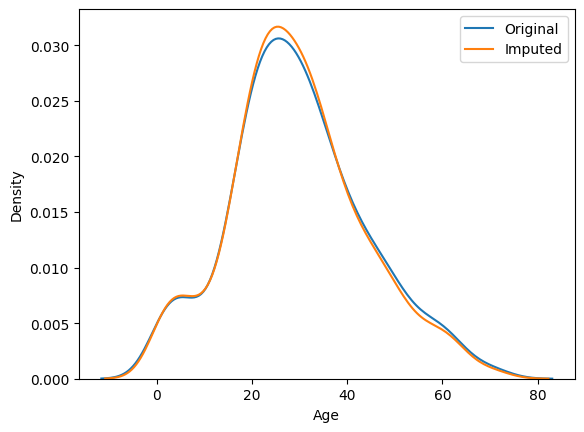

In [28]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [29]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  195.44106386933265


In [30]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,67.312221
Age,71.512440,204.349513,204.349513
Age_imputed,67.312221,204.349513,195.441064


<Axes: >

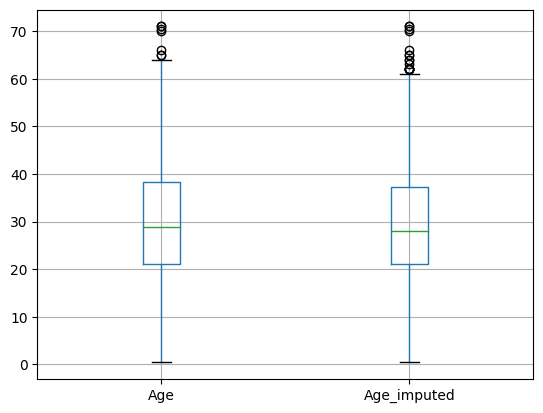

In [31]:
X_train[['Age', 'Age_imputed']].boxplot()

### **Note:** *Now in production, there could be a chance our model gives diff. prediction on same input; lets say Fare=5 but Age is missing, since Age is randomly imputed, this may vary our model output. This can be fixed by using random state param in sample keeping an observation on Fare col. Means for one(unique) Fare value, it will always return the same Age value.*

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(real_data['Fare']))

In [9]:
data = pd.read_csv('/kaggle/input/house-price-prediction/train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.sample(10)

,FireplaceQu,GarageQual,SalePrice
250,NaN,NaN,76500
947,Gd,TA,270000
617,NaN,TA,105500
1265,NaN,TA,183900
313,Gd,TA,375000
954,NaN,NaN,127500
83,NaN,TA,126500
523,Gd,TA,184750
173,TA,TA,163000
991,Gd,TA,168000


In [10]:
data.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [33]:
X_train,X_test,y_train,y_test = train_test_split(data,
                                                data['SalePrice'],
                                                test_size=0.2,
                                                random_state=2)
X_train.isnull().mean()

FireplaceQu    0.476884
GarageQual     0.055651
SalePrice      0.000000
dtype: float64

In [34]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [35]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,NaN,TA
504,Fa,TA,147000,Fa,TA
1413,Gd,TA,257000,Gd,TA
1389,Gd,TA,131000,Gd,TA


In [36]:
indexes = X_train[X_train['FireplaceQu_imputed'].isnull()].index
X_train.loc[indexes,'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

indexes_test = X_test[X_test['FireplaceQu_imputed'].isnull()].index
X_test.loc[indexes_test,'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


indexes = X_train[X_train['GarageQual_imputed'].isnull()].index
X_train.loc[indexes,'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

indexes_test = X_test[X_test['GarageQual_imputed'].isnull()].index
X_test.loc[indexes_test,'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train.isnull().sum()

FireplaceQu            557
GarageQual              65
SalePrice                0
FireplaceQu_imputed      0
GarageQual_imputed       0
dtype: int64

In [37]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [38]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.494272,0.496575
TA,0.412439,0.408390
Fa,0.040917,0.042808
Po,0.027823,0.027397
Ex,0.024550,0.024829


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

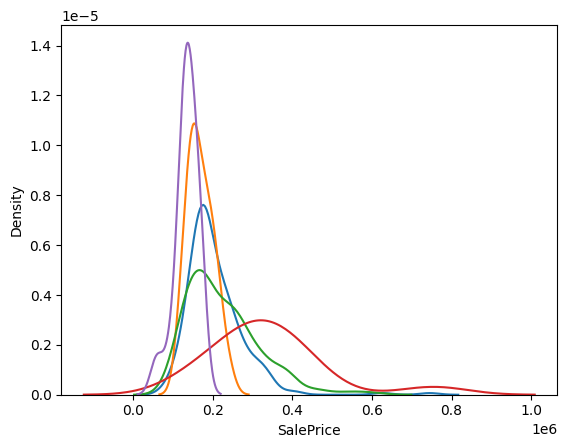

In [40]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

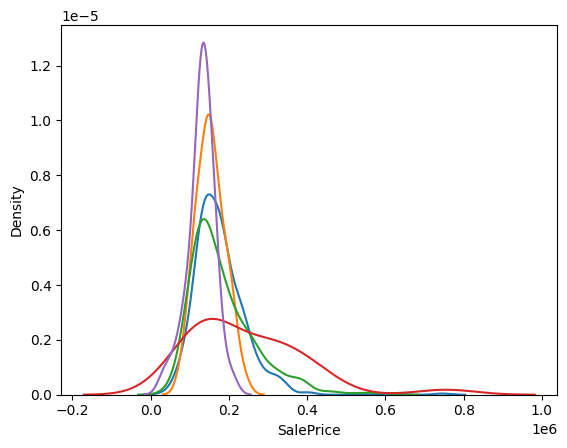

In [41]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()